In [333]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rcb-vs-kkr-match/deliveries.csv
/kaggle/input/rcb-vs-kkr-match/matches.csv


In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../input/rcb-vs-kkr-match/deliveries.csv")
df.head()
df.info()
import os
print(os.listdir("../input"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [335]:
df1=pd.read_csv("../input/rcb-vs-kkr-match/matches.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# QUES 1

In [336]:
df2=df1[['team1','team2','winner','result','toss_winner','toss_decision','season',]]
df2.head()


,team1,team2,winner,result,toss_winner,toss_decision,season
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,Royal Challengers Bangalore,field,2017
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,normal,Rising Pune Supergiant,field,2017
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2017
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,normal,Kings XI Punjab,field,2017
4,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,bat,2017


In [337]:
df3 = df2[(df2['team1']=='Royal Challengers Bangalore') & (df2['team2'] == 'Kolkata Knight Riders') | (df2['team1']=='Kolkata Knight Riders') & (df2['team2'] == 'Royal Challengers Bangalore')]
df3



,team1,team2,winner,result,toss_winner,toss_decision,season
26,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,normal,Royal Challengers Bangalore,field,2017
44,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2017
59,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,normal,Royal Challengers Bangalore,field,2008
87,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,normal,Kolkata Knight Riders,bat,2008
133,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,Kolkata Knight Riders,bat,2009
155,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,field,2009
177,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2010
216,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,field,2010
257,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,field,2011
290,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,field,2011


In [338]:
df3['winner'].value_counts()


Kolkata Knight Riders          14
Royal Challengers Bangalore    10
Name: winner, dtype: int64

Text(0, 14, '14')

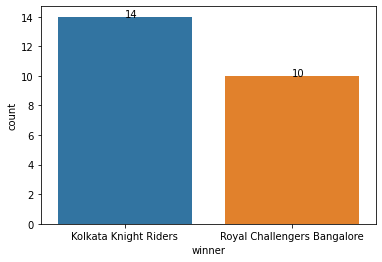

In [339]:
sns.countplot(df3['winner'])

plt.text(1,10,str(10))
plt.text(0,14,str(14))

In [340]:
df3['toss_decision'].value_counts()

field    21
bat       3
Name: toss_decision, dtype: int64

In [341]:
matches_played=pd.concat([df1['team1'],df1['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=df1['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
matches_played.reset_index().head(8)


,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,84
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,77
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58


In [342]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(8)

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Delhi Capitals                 47.5
Kings XI Punjab                46.6
Chennai Super Kings            47.0
Rajasthan Royals               51.0
Sunrisers Hyderabad            53.7
dtype: float64

In [343]:
total=df1.groupby('team1')['id'].count() + df1.groupby('team2')['id'].count()
total

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: id, dtype: int64

Text(0.5, 1.0, 'WIN PERCENTAGE BY TEAMS')

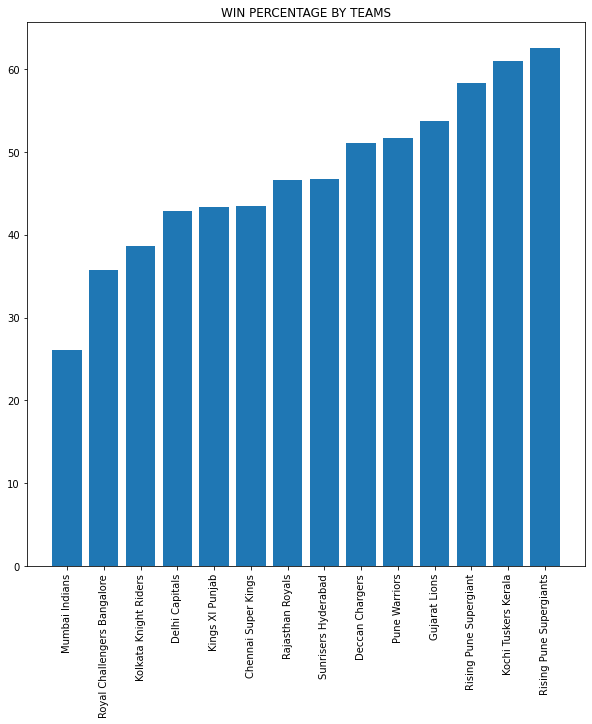

In [344]:
plt.figure(figsize=(10,10))
plt.bar(win_percentage.index,((df1['winner'].value_counts()/ total)*100).sort_values())
plt.xticks(rotation=90)
plt.title('WIN PERCENTAGE BY TEAMS')

Text(0, 5, '4')

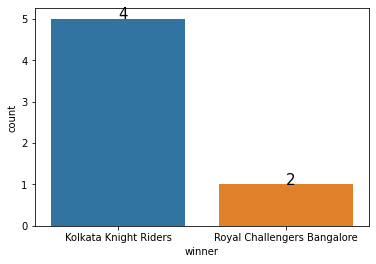

In [345]:
last_3=df3[df3['season']>2016]
sns.countplot(last_3['winner'],data=last_3)
plt.text(1,1,str(2),fontsize=15)
plt.text(0,5,str(4),fontsize=15)

# QUES 2

In [346]:
df4= df[['match_id','bowling_team','batting_team','over','player_dismissed']]
df5=df4[(df4['batting_team'] == 'Royal Challengers Bangalore') & (df4['bowling_team'] == 'Kolkata Knight Riders') &(df4['over'] > 5)]
df5=df5.fillna(0)

In [347]:
df5['player_dismissed'] = df5['player_dismissed'].apply(lambda x: 'NO WICKET'  if x== 0 else 'WICKET')
df5

,match_id,bowling_team,batting_team,over,player_dismissed
6408,27,Kolkata Knight Riders,Royal Challengers Bangalore,6,NO WICKET
6409,27,Kolkata Knight Riders,Royal Challengers Bangalore,6,NO WICKET
6410,27,Kolkata Knight Riders,Royal Challengers Bangalore,6,NO WICKET
6411,27,Kolkata Knight Riders,Royal Challengers Bangalore,6,NO WICKET
6412,27,Kolkata Knight Riders,Royal Challengers Bangalore,6,NO WICKET
...,...,...,...,...,...
173125,11326,Kolkata Knight Riders,Royal Challengers Bangalore,20,NO WICKET
173126,11326,Kolkata Knight Riders,Royal Challengers Bangalore,20,NO WICKET
173127,11326,Kolkata Knight Riders,Royal Challengers Bangalore,20,NO WICKET
173128,11326,Kolkata Knight Riders,Royal Challengers Bangalore,20,NO WICKET


In [348]:
df5['player_dismissed'].value_counts()

NO WICKET    1839
WICKET        100
Name: player_dismissed, dtype: int64

In [349]:
# From above analysis 
total_dismissals_of_RCB_vsKKR_after_firstfive_overs = 100
total_matches=df5['match_id'].nunique()
total_matches

24

In [350]:
#Calculating wicket per match in after first-five overs
wickets=total_dismissals_of_RCB_vsKKR_after_firstfive_overs/total_matches
wickets

4.166666666666667

# QUES 3

In [351]:
a= df[['match_id','over','ball','bowling_team','batsman','batsman_runs']]
b=a[(a['bowling_team']=='Kolkata Knight Riders') & (a['batsman'] == 'AB de Villiers')]
b

,match_id,over,ball,bowling_team,batsman,batsman_runs
6384,27,2,3,Kolkata Knight Riders,AB de Villiers,0
6385,27,2,4,Kolkata Knight Riders,AB de Villiers,4
6386,27,2,5,Kolkata Knight Riders,AB de Villiers,0
6387,27,2,6,Kolkata Knight Riders,AB de Villiers,0
6389,27,3,2,Kolkata Knight Riders,AB de Villiers,4
...,...,...,...,...,...,...
168767,11153,16,6,Kolkata Knight Riders,AB de Villiers,4
168773,11153,17,6,Kolkata Knight Riders,AB de Villiers,6
168783,11153,19,4,Kolkata Knight Riders,AB de Villiers,2
168784,11153,19,5,Kolkata Knight Riders,AB de Villiers,1


In [352]:
total_runs_scored_by_Villiers=b['batsman_runs'].sum()
total_runs_scored_by_Villiers

364

In [353]:
total_no_of_balls_faced=b['ball'].value_counts().sum()
total_no_of_balls_faced

265

In [354]:
# To calculate balls required to score 30 runs we will be using:
balls_req=(total_no_of_balls_faced*30)/total_runs_scored_by_Villiers
balls_req

21.84065934065934

# QUES 4

In [355]:
c= df[['match_id','bowling_team','batsman','batsman_runs','ball']]
c=c.fillna(0)
d=c[(c['bowling_team']=='Royal Challengers Bangalore') & (c['batsman'] == 'EJG Morgan')]
d

,match_id,bowling_team,batsman,batsman_runs,ball
60997,258,Royal Challengers Bangalore,EJG Morgan,1,3
61001,258,Royal Challengers Bangalore,EJG Morgan,1,1
61003,258,Royal Challengers Bangalore,EJG Morgan,1,3
61010,258,Royal Challengers Bangalore,EJG Morgan,1,4
61012,258,Royal Challengers Bangalore,EJG Morgan,2,6
61013,258,Royal Challengers Bangalore,EJG Morgan,0,7
68723,291,Royal Challengers Bangalore,EJG Morgan,1,1
68728,291,Royal Challengers Bangalore,EJG Morgan,1,6
68729,291,Royal Challengers Bangalore,EJG Morgan,0,1
68730,291,Royal Challengers Bangalore,EJG Morgan,0,2


In [356]:
total_no_of_balls_faced=d['ball'].value_counts().sum()
total_no_of_balls_faced

41

In [357]:
totalruns_against_vsRCB=d['batsman_runs'].sum()
totalruns_against_vsRCB

43

In [358]:
overall_strikerate=(totalruns_against_vsRCB/total_no_of_balls_faced)*100
overall_strikerate

104.8780487804878

In [359]:
d.mean()

match_id        472.658537
batsman_runs      1.048780
ball              3.658537
dtype: float64

In [360]:
d.median()

match_id        568.0
batsman_runs      1.0
ball              4.0
dtype: float64

In [361]:
d.mode()

,match_id,bowling_team,batsman,batsman_runs,ball
0,580.0,Royal Challengers Bangalore,EJG Morgan,1.0,1
1,NaN,NaN,NaN,NaN,6


In [362]:
c= df[['match_id','bowling_team','batsman','batsman_runs','ball']]
c=c.fillna(0)
d=c[(c['bowling_team']=='Royal Challengers Bangalore') & (c['batsman'] == 'EJG Morgan')]
d

,match_id,bowling_team,batsman,batsman_runs,ball
60997,258,Royal Challengers Bangalore,EJG Morgan,1,3
61001,258,Royal Challengers Bangalore,EJG Morgan,1,1
61003,258,Royal Challengers Bangalore,EJG Morgan,1,3
61010,258,Royal Challengers Bangalore,EJG Morgan,1,4
61012,258,Royal Challengers Bangalore,EJG Morgan,2,6
61013,258,Royal Challengers Bangalore,EJG Morgan,0,7
68723,291,Royal Challengers Bangalore,EJG Morgan,1,1
68728,291,Royal Challengers Bangalore,EJG Morgan,1,6
68729,291,Royal Challengers Bangalore,EJG Morgan,0,1
68730,291,Royal Challengers Bangalore,EJG Morgan,0,2


In [363]:
d['match_id'].unique()

array([258, 291, 392, 568, 580])

In [364]:
e=d[(d['match_id'] == 258)]
e

,match_id,bowling_team,batsman,batsman_runs,ball
60997,258,Royal Challengers Bangalore,EJG Morgan,1,3
61001,258,Royal Challengers Bangalore,EJG Morgan,1,1
61003,258,Royal Challengers Bangalore,EJG Morgan,1,3
61010,258,Royal Challengers Bangalore,EJG Morgan,1,4
61012,258,Royal Challengers Bangalore,EJG Morgan,2,6
61013,258,Royal Challengers Bangalore,EJG Morgan,0,7


In [365]:
#Since it only include 6 balls faced So we can choose from starting also and end also both meaning same.
total_no_of_balls_faced=e['ball'].value_counts().sum()
total_no_of_balls_faced

6

In [366]:
totalruns_against_vsRCB=e['batsman_runs'].sum()
totalruns_against_vsRCB

6

In [367]:
over_strikerate=(totalruns_against_vsRCB/total_no_of_balls_faced)*100
over_strikerate

100.0

In [368]:
#Since it only include 5 balls faced So we can choose from starting also and end also both meaning same.
f=d[(d['match_id'] == 291)]
f

,match_id,bowling_team,batsman,batsman_runs,ball
68723,291,Royal Challengers Bangalore,EJG Morgan,1,1
68728,291,Royal Challengers Bangalore,EJG Morgan,1,6
68729,291,Royal Challengers Bangalore,EJG Morgan,0,1
68730,291,Royal Challengers Bangalore,EJG Morgan,0,2
68731,291,Royal Challengers Bangalore,EJG Morgan,0,3


In [369]:
total_no_of_balls_faced=f['ball'].value_counts().sum()
total_no_of_balls_faced

5

In [370]:
totalruns_against_vsRCB=f['batsman_runs'].sum()
totalruns_against_vsRCB

2

In [371]:
over_strikerate=(totalruns_against_vsRCB/total_no_of_balls_faced)*100
over_strikerate

40.0

In [372]:
g=d[(d['match_id'] == 392)]
g

,match_id,bowling_team,batsman,batsman_runs,ball
92735,392,Royal Challengers Bangalore,EJG Morgan,0,4
92736,392,Royal Challengers Bangalore,EJG Morgan,0,5
92737,392,Royal Challengers Bangalore,EJG Morgan,0,6
92738,392,Royal Challengers Bangalore,EJG Morgan,2,1
92739,392,Royal Challengers Bangalore,EJG Morgan,0,2


In [373]:
h=d[(d['match_id'] == 568)]
h

,match_id,bowling_team,batsman,batsman_runs,ball
134506,568,Royal Challengers Bangalore,EJG Morgan,1,4
134508,568,Royal Challengers Bangalore,EJG Morgan,1,6
134509,568,Royal Challengers Bangalore,EJG Morgan,0,1
134510,568,Royal Challengers Bangalore,EJG Morgan,1,2
134512,568,Royal Challengers Bangalore,EJG Morgan,2,4
134513,568,Royal Challengers Bangalore,EJG Morgan,6,5
134514,568,Royal Challengers Bangalore,EJG Morgan,0,6


In [374]:
i=d[(d['match_id'] == 580)]
i

,match_id,bowling_team,batsman,batsman_runs,ball
137208,580,Royal Challengers Bangalore,EJG Morgan,1,6
137209,580,Royal Challengers Bangalore,EJG Morgan,0,1
137214,580,Royal Challengers Bangalore,EJG Morgan,4,6
137215,580,Royal Challengers Bangalore,EJG Morgan,0,7
137218,580,Royal Challengers Bangalore,EJG Morgan,1,3
137228,580,Royal Challengers Bangalore,EJG Morgan,1,1
137230,580,Royal Challengers Bangalore,EJG Morgan,1,3
137235,580,Royal Challengers Bangalore,EJG Morgan,4,2
137236,580,Royal Challengers Bangalore,EJG Morgan,0,3
137237,580,Royal Challengers Bangalore,EJG Morgan,2,4


In [375]:
# from taking one match at a time and calculating strike rate and then calcuating difference of their strike rates.Differences of srtike rate was always less than 75.

# QUES 5

In [376]:
df6= df[['match_id','bowling_team','batting_team','total_runs','over']]
df7=df6[(df6['batting_team']=='Royal Challengers Bangalore') & (df6['bowling_team'] == 'Kolkata Knight Riders') & (df6['over']>16)]
df7




,match_id,bowling_team,batting_team,total_runs,over
10504,45,Kolkata Knight Riders,Royal Challengers Bangalore,1,17
10505,45,Kolkata Knight Riders,Royal Challengers Bangalore,0,17
10506,45,Kolkata Knight Riders,Royal Challengers Bangalore,1,17
10507,45,Kolkata Knight Riders,Royal Challengers Bangalore,0,17
10508,45,Kolkata Knight Riders,Royal Challengers Bangalore,1,17
...,...,...,...,...,...
173125,11326,Kolkata Knight Riders,Royal Challengers Bangalore,4,20
173126,11326,Kolkata Knight Riders,Royal Challengers Bangalore,6,20
173127,11326,Kolkata Knight Riders,Royal Challengers Bangalore,1,20
173128,11326,Kolkata Knight Riders,Royal Challengers Bangalore,4,20


In [377]:
total_runs_scored_at_death_byRCB=df7['total_runs'].sum()
total_runs_scored_at_death_byRCB

770

In [378]:
# Matches RCB has played against KKR and facing death overs....
match=df7['match_id'].nunique()
match

19

In [379]:
#total runs scored at death by RCB against KKR
runs=total_runs_scored_at_death_byRCB/match
runs

40.526315789473685